# **👩‍💻 LIMPEZA, ANÁLISE E PREDIÇÃO DE DADOS 👩‍💻**
## Autora: Isabella Soares Camareli
---

In [147]:
# importando bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
# importando o dataset
df_train = pd.read_csv("train.csv")

In [149]:
df_train.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0


In [150]:
df_train.describe(include=['object']).T

,count,unique,top,freq
city,19158,123,city_103,4355
gender,14650,3,Male,13221
relevent_experience,19158,2,Has relevent experience,13792
enrolled_university,18772,3,no_enrollment,13817
education_level,18698,5,Graduate,11598
major_discipline,16345,6,STEM,14492
experience,19093,22,>20,3286
company_size,13220,8,50-99,3083
company_type,13018,6,Pvt Ltd,9817
last_new_job,18735,6,1,8040


In [151]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

## **LIMPEZA DE DADOS**

---

In [152]:
# definindo index

df_train.set_index("enrollee_id", inplace=True)

In [153]:
# Procurando duplicatas 
duplicados = df_train[df_train.duplicated()]
print(duplicados)

                 city  city_development_index  gender  \
enrollee_id                                             
6685          city_16                   0.910    Male   
25835        city_159                   0.843    Male   
3015          city_16                   0.910    Male   
1686         city_103                   0.920    Male   
23517        city_103                   0.920    Male   
19041        city_103                   0.920    Male   
29930        city_103                   0.920    Male   
3736         city_160                   0.920    Male   
27402        city_103                   0.920    Male   
23179        city_103                   0.920    Male   
19320        city_103                   0.920    Male   
9755          city_21                   0.624    Male   
8569         city_103                   0.920    Male   
32121        city_103                   0.920    Male   
24752        city_103                   0.920    Male   
27043        city_103          

In [154]:
# Removendo duplicatas
df_train.drop_duplicates(inplace=True) 

### Limpando coluna city_development_index

In [155]:
df_train.city_development_index.unique()

array([0.92 , 0.776, 0.624, 0.789, 0.767, 0.764, 0.762, 0.913, 0.926,
       0.827, 0.843, 0.804, 0.855, 0.887, 0.91 , 0.884, 0.924, 0.666,
       0.558, 0.923, 0.794, 0.754, 0.939, 0.55 , 0.865, 0.698, 0.893,
       0.796, 0.866, 0.682, 0.802, 0.579, 0.878, 0.897, 0.949, 0.925,
       0.896, 0.836, 0.693, 0.769, 0.775, 0.903, 0.555, 0.727, 0.64 ,
       0.516, 0.743, 0.899, 0.915, 0.689, 0.895, 0.89 , 0.847, 0.527,
       0.766, 0.738, 0.647, 0.795, 0.74 , 0.701, 0.493, 0.84 , 0.691,
       0.735, 0.742, 0.479, 0.722, 0.921, 0.848, 0.856, 0.898, 0.83 ,
       0.73 , 0.68 , 0.725, 0.556, 0.448, 0.763, 0.745, 0.645, 0.788,
       0.78 , 0.512, 0.739, 0.563, 0.518, 0.824, 0.487, 0.649, 0.781,
       0.625, 0.807, 0.664])

In [156]:
def decimaliza (numero):

    while numero > 1:
        numero = numero/10
    return numero

In [157]:
df_train["city_development_index"] = df_train["city_development_index"].apply(decimaliza)

### Limpando coluna last_new_job

In [158]:
df_train.last_new_job.unique()

array(['1', '>4', 'never', '4', '3', '2', nan], dtype=object)

In [159]:
df_train["last_new_job"].replace("never", "5" , inplace=True)
df_train["last_new_job"].replace(">4", "5" , inplace=True)
df_train['last_new_job']= pd.to_numeric(df_train["last_new_job"], downcast='integer')

In [160]:
df_train.dropna(subset= ['last_new_job'], inplace= True)

### Limpando coluna company_type

In [161]:
df_train.company_type.unique()

array([nan, 'Pvt Ltd', 'Funded Startup', 'Early Stage Startup', 'Other',
       'Public Sector', 'NGO'], dtype=object)

In [162]:
# dummies_type= pd.get_dummies(df_train['company_type'], dummy_na= True)
# df_train = df_train.drop('company_type', axis = 1)
# df_train = df_train.join(dummies_type)

### Limpando coluna company_size

In [163]:
# dropando company_size
df_train = df_train.drop('company_size', axis = 1)

### Limpando coluna experience

In [164]:
df_train.experience.unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

In [165]:
xp= {
    ">20": "21", 
    "<1": "0"
}
df_train["experience"].replace(xp, inplace=True)
df_train['experience']= pd.to_numeric(df_train["experience"], downcast='float')

In [166]:
df_train.dropna(subset= ['experience'], inplace= True)

### Limpando coluna major_discipline

In [167]:
df_train.major_discipline.unique()

array(['STEM', 'Business Degree', nan, 'Arts', 'Humanities', 'No Major',
       'Other'], dtype=object)

In [168]:
# dummies_major= pd.get_dummies(df_train['major_discipline'])
# dummies_major.rename(columns= { "Other": "Other_disciplines"}, inplace=True)
# df_train = df_train.join(dummies_major)
# df_train = df_train.drop('major_discipline',axis = 1)

### Limpando coluna education_level

In [169]:
df_train.education_level.unique()

array(['Graduate', 'Masters', 'High School', nan, 'Phd', 'Primary School'],
      dtype=object)

In [170]:
df_train.dropna(subset= ['education_level'], inplace= True)

In [171]:
educationum ={
    "Primary School": 1,
    "High School": 2,
    "Graduate": 3,
    "Masters":4,    
    "Phd": 5,    
}
df_train["education_level"].replace(educationum, inplace=True)
df_train['education_level']= pd.to_numeric(df_train["education_level"], downcast='float')

### Limpando coluna enrolled_university

In [172]:
df_train.enrolled_university.unique()

array(['no_enrollment', 'Full time course', nan, 'Part time course'],
      dtype=object)

In [173]:
universitynum ={
    "Part time course": 1,
    "Full time course": 2,
    "no_enrollment": 0,
}
df_train["enrolled_university"].replace(universitynum, inplace=True)
df_train['enrolled_university']= pd.to_numeric(df_train["enrolled_university"], downcast='float')

In [174]:
df_train.dropna(subset= ['enrolled_university'], inplace= True)

### Limpando coluna relevent_experience

In [175]:
df_train.relevent_experience.unique()

array(['Has relevent experience', 'No relevent experience'], dtype=object)

In [176]:
experience ={
    "Has relevent experience": 1,
    "No relevent experience": 0,
}
df_train["relevent_experience"].replace(experience, inplace=True)
df_train['relevent_experience']= pd.to_numeric(df_train["relevent_experience"], downcast='float')

### Limpando coluna gender

In [177]:
df_train.gender.unique()

array(['Male', nan, 'Female', 'Other'], dtype=object)

In [178]:
df_train["gender"].fillna(df_train["gender"].mode()[0], inplace=True)

In [179]:
# dummies_gender= pd.get_dummies(df_train['gender'])
# dummies_gender.rename(columns= { "Other": "Other_gender"}, inplace=True)
# df_train = df_train.join(dummies_gender)
# df_train = df_train.drop('gender',axis = 1)

In [180]:
# dummies_city= pd.get_dummies(df_train['city'])
# df_train = df_train.join(dummies_city)
# df_train = df_train.drop('city',axis = 1)

# **ANÁLISE DOS DADOS**

---

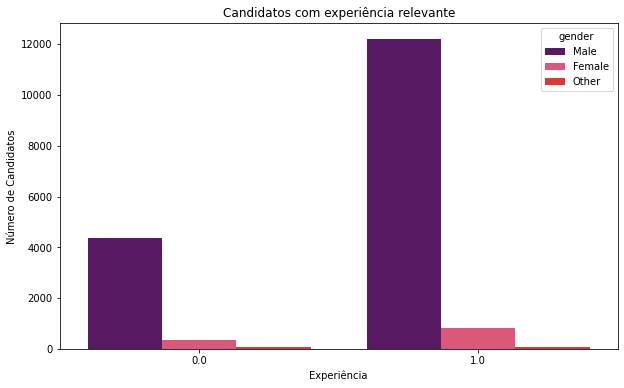

In [181]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'relevent_experience', data = df_train, hue = 'gender', palette=["#5F0E6F", "#F2426F", "#F91C1C"])
sns.color_palette()
plt.ylabel('Número de Candidatos')
plt.xlabel("Experiência")
plt.title("Candidatos com experiência relevante")
plt.show()

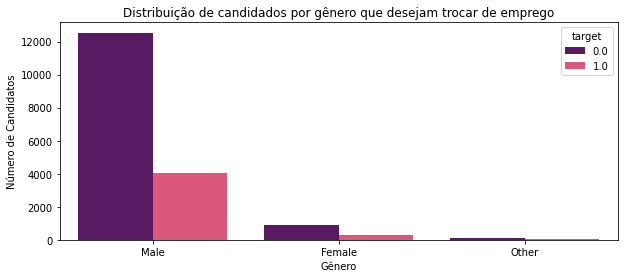

In [182]:
plt.figure(figsize = (10,4))
sns.countplot(x = 'gender', data = df_train, hue = 'target', palette=["#5F0E6F", "#F2426F", "#F91C1C"])
sns.color_palette()
plt.ylabel('Número de Candidatos')
plt.xlabel('Gênero')
plt.title('Distribuição de candidados por gênero que desejam trocar de emprego')
plt.show()

Com base nos gráficos acima, é possível observar que, apesar da quantidade de homens ser exacerbadamente maior em relação aos gêneros, esse fato não parece ter influência na quantidade de experiência de cada indivíduo. Da mesma forma, nota-se que a distribuição de candidatos por gênero que intentam trocar de emprego segue o mesmo padrão.

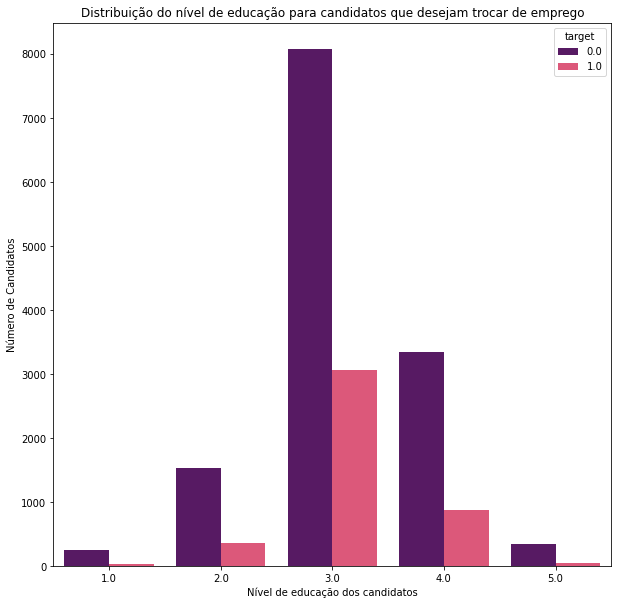

In [183]:
plt.figure(figsize = (10,10))
sns.countplot(x = 'education_level', data = df_train, hue = 'target', palette=["#5F0E6F", "#F2426F"])
plt.ylabel('Número de Candidatos')
plt.xlabel("Nível de educação dos candidatos")
plt.title('Distribuição do nível de educação para candidatos que desejam trocar de emprego')
plt.show()


No gráfico acima estão representados os níveis de educação dos candidatos. O número 1 representa a escola primária, o ensino médio é representado por 2, enquanto 3 corresponde aos graduados, mestres são 4, e 5 são os indivíduos com Ph.D. 
Desse modo, pode-se observar que grande parte dos candidatos já possuem, ao menos, a graduação e, além disso, nota-se que a maioria das pessoas que estão procurando uma mudança de emprego, naturalmente, são os graduados.

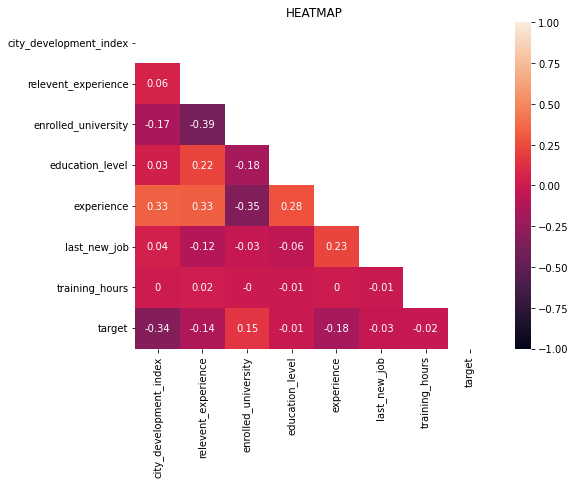

In [184]:
plt.figure(figsize=(8,6))

corr = df_train.corr()
mask = mask = np.zeros_like(corr) 
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, vmax=1, vmin=-1, annot=np.round(corr.values, 2), mask=mask) 
sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
plt.title("HEATMAP")
plt.show()

Tendo em vista o gráfico acima, depreende-se que nenhuma feature numérica é análoga à coluna target de modo direto. 
Contudo, vale ressaltar que o índice de desenvolvimento da cidade demonstra uma relação inversamente proporcional à target. Isso pode ocorrer como um reflexo do fato dos indivíduos dessas cidades não estarem buscando novos empregos, uma vez que já estão satisfeitos devido ao maior o índice de desenvolvimento de suas cidades.

In [185]:
# transformando valores categóricos em numéricos para que o modelo funcione

# city
dummies_city= pd.get_dummies(df_train['city'])
df_train = df_train.join(dummies_city)
df_train = df_train.drop('city',axis = 1)

# gender
dummies_gender= pd.get_dummies(df_train['gender'])
dummies_gender.rename(columns= { "Other": "Other_gender"}, inplace=True)
df_train = df_train.join(dummies_gender)
df_train = df_train.drop('gender',axis = 1)

# major_discipline

dummies_major= pd.get_dummies(df_train['major_discipline'])
dummies_major.rename(columns= { "Other": "Other_disciplines"}, inplace=True)
df_train = df_train.join(dummies_major)
df_train = df_train.drop('major_discipline',axis = 1)

# company_type

dummies_type= pd.get_dummies(df_train['company_type'], dummy_na= True)
df_train = df_train.drop('company_type', axis = 1)
df_train = df_train.join(dummies_type)

## **TREINANDO E PREDIZENDO OS DADOS**

---

In [187]:
# importando bibliotecas

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [188]:
# separando dataset
y = df_train.target

X = df_train.drop('target',axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=72, test_size=0.3)

In [189]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

C:\Users\isaca\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\isaca\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\isaca\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


## Regressão Logística

In [190]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_predict = logreg.predict(X_test)

In [191]:
# Métricas
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.82      0.92      0.87      4085
         1.0       0.60      0.36      0.45      1305

    accuracy                           0.79      5390
   macro avg       0.71      0.64      0.66      5390
weighted avg       0.76      0.79      0.77      5390



Text(0.5, 1.0, 'ROC Curve')

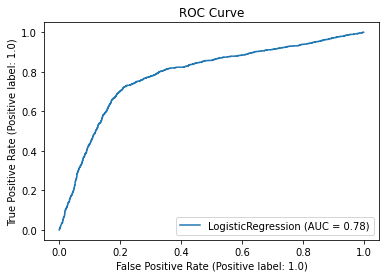

In [192]:
RocCurveDisplay.from_estimator(logreg, X_test, y_test)
plt.title('ROC Curve')

Text(0.5, 1.0, 'Confusion Matrix')

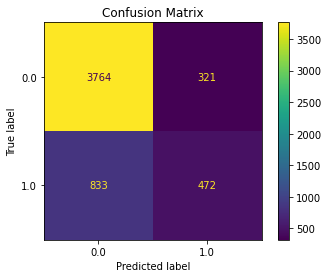

In [193]:
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test)
plt.title('Confusion Matrix')

## Árvore de Decisão

In [194]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

[Text(528.1071428571428, 733.86, 'X[0] <= -1.69\ngini = 0.372\nsamples = 12575\nvalue = [9471, 3104]'),
 Text(259.07142857142856, 570.78, 'X[6] <= 0.29\ngini = 0.482\nsamples = 2192\nvalue = [887, 1305]'),
 Text(159.42857142857142, 407.70000000000005, 'X[4] <= 0.626\ngini = 0.473\nsamples = 1604\nvalue = [614, 990]'),
 Text(79.71428571428571, 244.62, 'X[6] <= -0.362\ngini = 0.469\nsamples = 1500\nvalue = [564, 936]'),
 Text(39.857142857142854, 81.54000000000008, 'gini = 0.479\nsamples = 960\nvalue = [381, 579]'),
 Text(119.57142857142856, 81.54000000000008, 'gini = 0.448\nsamples = 540\nvalue = [183, 357]'),
 Text(239.1428571428571, 244.62, 'X[5] <= -0.072\ngini = 0.499\nsamples = 104\nvalue = [50, 54]'),
 Text(199.28571428571428, 81.54000000000008, 'gini = 0.45\nsamples = 38\nvalue = [13, 25]'),
 Text(279.0, 81.54000000000008, 'gini = 0.493\nsamples = 66\nvalue = [37, 29]'),
 Text(358.71428571428567, 407.70000000000005, 'X[6] <= 0.307\ngini = 0.497\nsamples = 588\nvalue = [273, 315]')

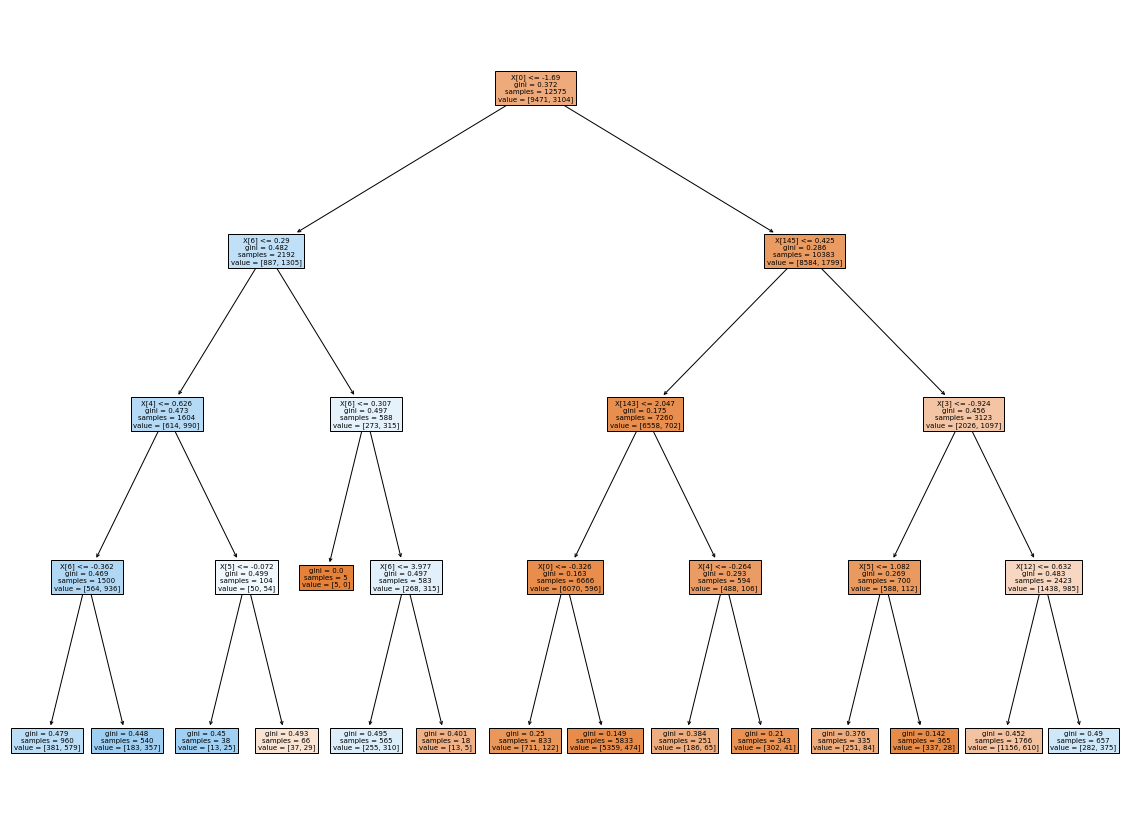

In [195]:
clf_model = DecisionTreeClassifier(criterion = "gini", random_state = 42, max_depth = 4, min_samples_leaf =5)
clf_model.fit(X_train,y_train)
y_predict = clf_model.predict(X_test)
plt.figure(figsize=(20,15))
plot_tree(clf_model, filled=True)

In [196]:
# Métricas
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86      4085
         1.0       0.56      0.49      0.53      1305

    accuracy                           0.78      5390
   macro avg       0.70      0.69      0.69      5390
weighted avg       0.78      0.78      0.78      5390



Text(0.5, 1.0, 'ROC Curve')

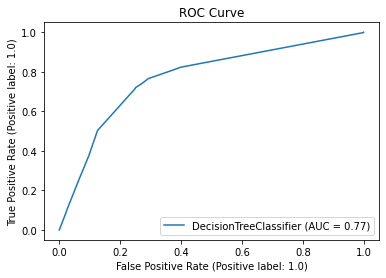

In [197]:
RocCurveDisplay.from_estimator(clf_model, X_test, y_test)
plt.title('ROC Curve')

Text(0.5, 1.0, 'Confusion Matrix')

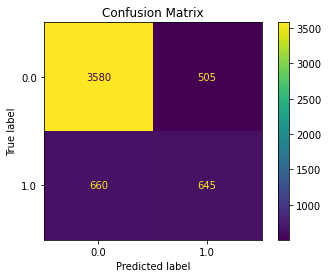

In [198]:
ConfusionMatrixDisplay.from_estimator(clf_model, X_test, y_test)
plt.title('Confusion Matrix')

## Random Forest

In [199]:
from sklearn.ensemble import RandomForestClassifier

In [204]:
rf = RandomForestClassifier(max_depth = 20, n_estimators = 200, min_samples_split = 50, criterion = 'entropy', oob_score = True, random_state = 42)
rf.fit(X_train, y_train)
y_predict = rf.predict(X_test)

In [205]:
# Métricas
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      4085
         1.0       0.56      0.44      0.50      1305

    accuracy                           0.78      5390
   macro avg       0.70      0.67      0.68      5390
weighted avg       0.77      0.78      0.77      5390



Text(0.5, 1.0, 'ROC Curve')

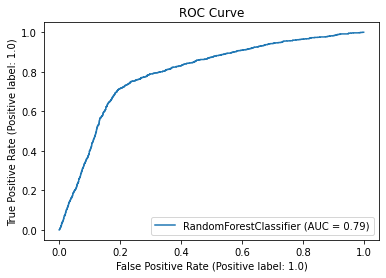

In [206]:
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title('ROC Curve')

Text(0.5, 1.0, 'Confusion Matrix')

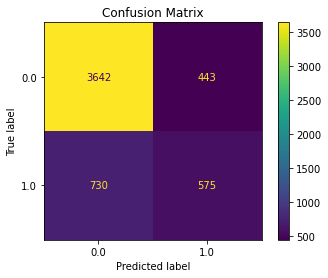

In [207]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.title('Confusion Matrix')

## KNN

In [208]:
from sklearn.neighbors import KNeighborsClassifier

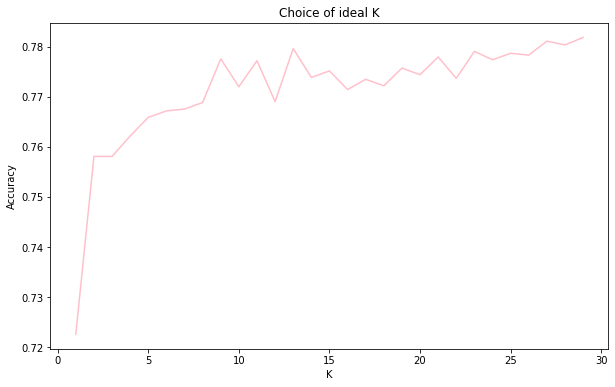

In [211]:
# escolhendo k ideal

k_range = range(1, 30)
scores = {}
scores_list = []
for k in k_range:
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    scores[k] = accuracy_score(y_test, y_predict)
    scores_list.append(accuracy_score(y_test, y_predict))
plt.figure(figsize = (10,6))
plt.plot(range(1, 30), scores_list, color = 'pink')
plt.ylabel('Accuracy')
plt.xlabel('K')
plt.title('Choice of ideal K')
plt.show()

In [212]:
model = KNeighborsClassifier(n_neighbors = 13)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [213]:
# Métricas
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      4085
         1.0       0.56      0.44      0.49      1305

    accuracy                           0.78      5390
   macro avg       0.69      0.66      0.68      5390
weighted avg       0.77      0.78      0.77      5390



Text(0.5, 1.0, 'ROC Curve')

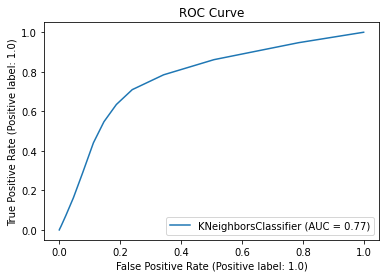

In [214]:
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title('ROC Curve')

Text(0.5, 1.0, 'Confusion Matrix')

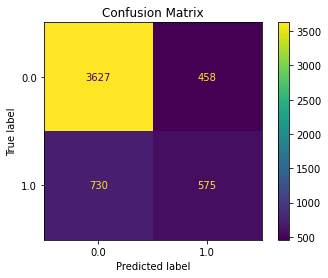

In [215]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title('Confusion Matrix')

## Naive Bayes

In [216]:
from sklearn.naive_bayes import GaussianNB

In [217]:
model = GaussianNB()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [218]:
# Métricas
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.84      0.08      0.15      4085
         1.0       0.25      0.95      0.39      1305

    accuracy                           0.29      5390
   macro avg       0.54      0.52      0.27      5390
weighted avg       0.70      0.29      0.21      5390



Text(0.5, 1.0, 'ROC Curve')

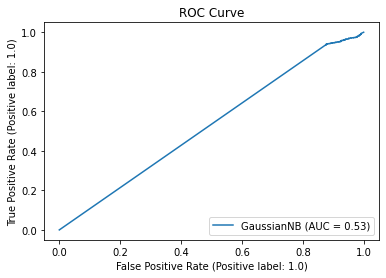

In [219]:
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title('ROC Curve')

Text(0.5, 1.0, 'Confusion Matrix')

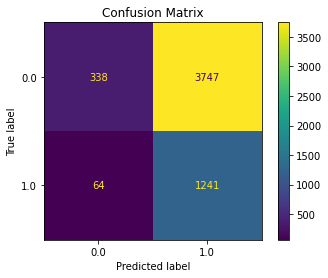

In [220]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title('Confusion Matrix')

## SVM

In [221]:
from sklearn.svm import SVC

In [222]:
svm_model = SVC(C = 1.0, probability=True)
svm_model.fit(X_train, y_train)
y_predict = svm_model.predict(X_test)

In [223]:
# Métricas
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86      4085
         1.0       0.56      0.39      0.46      1305

    accuracy                           0.78      5390
   macro avg       0.69      0.65      0.66      5390
weighted avg       0.76      0.78      0.76      5390



Text(0.5, 1.0, 'ROC Curve')

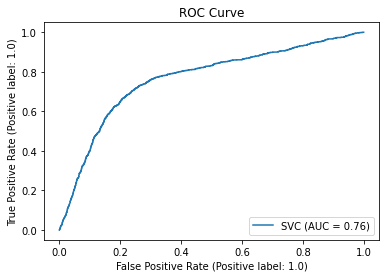

In [224]:
RocCurveDisplay.from_estimator(svm_model, X_test, y_test)
plt.title('ROC Curve')

Text(0.5, 1.0, 'Confusion Matrix')

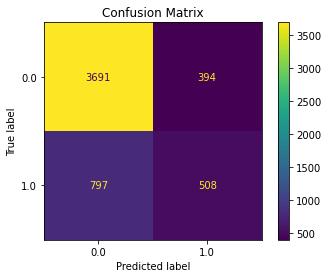

In [225]:
ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test)
plt.title('Confusion Matrix')

# **CONCLUSÃO**
---

Dessa forma, com base nos testes aplicados acima, é possível concluir que o melhor modelo de predição foi Random Forest, com acurácia de 78%, AUC: 0.79 e Confusion Matrix: 726. Porém, o modelo de Árvore de Decisão também se mostrou significativo, com uma acurácia de 78%, AUC: 0.77 e Confusion Matrix: 660.
